In [183]:
import numpy
import pandas 
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.core import Dropout
from keras.layers.normalization import BatchNormalization

import seaborn as sns
import matplotlib.pyplot as plt

In [184]:



df = pandas.read_csv('train.csv')
df_test = pandas.read_csv('test.csv')

df_all = pandas.concat([df, df_test], sort=False)

df_test_index = df_test[['PassengerId']]

df = df[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare','Age','Name']]
df_test = df_test[['Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare','Age','Name']]


In [185]:
categories = set(df_all['SibSp'].unique())
df['SibSp'] = pandas.Categorical(df['SibSp'], categories=categories)
df_test['SibSp'] = pandas.Categorical(df_test['SibSp'], categories=categories)

df = pandas.get_dummies(df, columns=['SibSp'])
df_test = pandas.get_dummies(df_test, columns=['SibSp'])

In [186]:
categories = set(df_all['Parch'].unique())
df['Parch'] = pandas.Categorical(df['Parch'], categories=categories)
df_test['Parch'] = pandas.Categorical(df_test['Parch'], categories=categories)

df = pandas.get_dummies(df, columns=['Parch'])
df_test = pandas.get_dummies(df_test, columns=['Parch'])

In [187]:
ticket_values = df_all['Ticket'].value_counts()
ticket_values = ticket_values[ticket_values > 1]
ticket_values = pandas.Series(ticket_values.index, name='Ticket')
categories = set(ticket_values.tolist())
df['Ticket'] = pandas.Categorical(df['Ticket'], categories=categories)
df_test['Ticket'] = pandas.Categorical(df_test['Ticket'], categories=categories)

df = pandas.get_dummies(df, columns=['Ticket'])
df_test = pandas.get_dummies(df_test, columns=['Ticket'])

In [188]:
df.mean()['Age']

29.69911764705882

In [189]:
df.fillna(df.mean()['Age'])


,Survived,Pclass,Sex,Fare,Age,Name,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Ticket_230080,Ticket_PC 17757,Ticket_13050,Ticket_24065,Ticket_113798,Ticket_2661,Ticket_A/4 48871,Ticket_248727,Ticket_C.A. 34651,Ticket_24160
0,0,3,male,7.2500,22.000000,"Braund, Mr. Owen Harris",0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,female,71.2833,38.000000,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,female,7.9250,26.000000,"Heikkinen, Miss. Laina",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,female,53.1000,35.000000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,male,8.0500,35.000000,"Allen, Mr. William Henry",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,13.0000,27.000000,"Montvila, Rev. Juozas",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,1,1,female,30.0000,19.000000,"Graham, Miss. Margaret Edith",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,3,female,23.4500,29.699118,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
889,1,1,male,30.0000,26.000000,"Behr, Mr. Karl Howell",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
df.isnull().sum()

Survived               0
Pclass                 0
Sex                    0
Fare                   0
Age                  177
                    ... 
Ticket_2661            0
Ticket_A/4 48871       0
Ticket_248727          0
Ticket_C.A. 34651      0
Ticket_24160           0
Length: 237, dtype: int64

In [191]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [192]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Sir           1
Ms            1
Jonkheer      1
Lady          1
Capt          1
Don           1
Mme           1
Name: Title, dtype: int64

In [193]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don',\
                                             'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],\
                                             'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

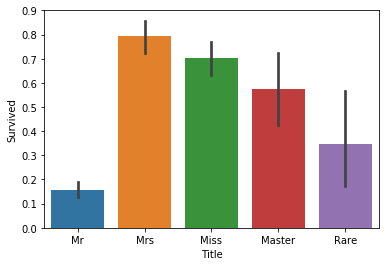

In [194]:
sns.barplot(x="Title", y="Survived", data=df);

#우리는 추가로 정보를 더 얻은 것 같습니다. 남자는 일반적으로 살아남지 못한 반면에, ‘Master(귀족)’ 타이틀을 가지고 있는 사람은 거의 60%가 생존했습니다. ‘Rare’ 타이틀을 가진 남성은 조금 더 생존하였습니다. 그러므로, 이러한 특성은 우리 모델에 더하는 것이 좋을 것 같습니다.

# 우리는 이제 이러한 값들을 숫자 형태로 바꿔야 합니다. 우리의 모델에 맞게 하기 위해서이죠. 이걸 실행하기 위한 간단한 코드는 아래와 같습니다.

In [195]:
_, df['Title'] = numpy.unique(df['Title'], return_inverse=True)

In [196]:
df['Title'].head(10)

0    2
1    3
2    1
3    3
4    2
5    2
6    2
7    0
8    3
9    3
Name: Title, dtype: int64

In [197]:
standard = StandardScaler()
df_std = pandas.DataFrame(standard.fit_transform(df[['Pclass', 'Fare']].values), columns=['Pclass', 'Fare'])
df.loc[:,'Pclass'] = df_std['Pclass']
df.loc[:,'Fare'] = df_std['Fare']

df_test_std = pandas.DataFrame(standard.transform(df_test[['Pclass', 'Fare']].values), columns=['Pclass', 'Fare'])
df_test.loc[:,'Pclass'] = df_test_std['Pclass']
df_test.loc[:,'Fare'] = df_test_std['Fare']

In [198]:
df

,Survived,Pclass,Sex,Fare,Age,Name,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Ticket_PC 17757,Ticket_13050,Ticket_24065,Ticket_113798,Ticket_2661,Ticket_A/4 48871,Ticket_248727,Ticket_C.A. 34651,Ticket_24160,Title
0,0,0.827377,male,-0.502445,22.0,"Braund, Mr. Owen Harris",0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
1,1,-1.566107,female,0.786845,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,1,0.827377,female,-0.488854,26.0,"Heikkinen, Miss. Laina",1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,-1.566107,female,0.420730,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0.827377,male,-0.486337,35.0,"Allen, Mr. William Henry",1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.369365,male,-0.386671,27.0,"Montvila, Rev. Juozas",1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
887,1,-1.566107,female,-0.044381,19.0,"Graham, Miss. Margaret Edith",1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,0.827377,female,-0.176263,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1,-1.566107,male,-0.044381,26.0,"Behr, Mr. Karl Howell",1,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [215]:


##############################
# Data preprocessing
# Fill or remove missing values
##############################
df = df[df['Fare'] != 5].reset_index(drop=True)
df = df[df['Fare'] != 0].reset_index(drop=True)

##############################
# Data preprocessing
# Digitize labels
##############################
# Gender
##############################
encoder_sex = LabelEncoder()
df['Sex'] = encoder_sex.fit_transform(df['Sex'].values)
df_test['Sex'] = encoder_sex.transform(df_test['Sex'].values)

## 데이터 인코딩 위에서 다 했음. 


##############################
# Data preprocessing
# Fill or remove missing values
##############################
df.fillna({'Fare':0}, inplace=True)
df_test.fillna({'Fare':0}, inplace=True)

##############################
# Split training data and test data
##############################
x_pre = df.drop(columns='Survived')
x = x_pre.drop(columns='Name')
y = df[['Survived']]

In [216]:
x

,Pclass,Sex,Fare,Age,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,...,Ticket_PC 17757,Ticket_13050,Ticket_24065,Ticket_113798,Ticket_2661,Ticket_A/4 48871,Ticket_248727,Ticket_C.A. 34651,Ticket_24160,Title
0,0.827377,1,-0.502445,22.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,-1.566107,0,0.786845,38.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0.827377,0,-0.488854,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.566107,0,0.420730,35.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0.827377,1,-0.486337,35.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,1,-0.386671,27.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
887,-1.566107,0,-0.044381,19.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0.827377,0,-0.176263,NaN,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,-1.566107,1,-0.044381,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [228]:
# model = Sequential()

# model.add(Dense(16, activation='relu', input_shape=(236,)))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [229]:
# # model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [ ]:
# model.fit(x,y, epochs=50, batch_size=1, verbose=1)

In [217]:
# ##############################
# # Model -> 5perceptron
# ##############################
# def create_model_5dim_layer_perceptron(input_dim, \
#                                        activation="relu", \
#                                        optimizer="adam", \
#                                        out_dim=100, \
#                                        dropout=0.5):

#     model = Sequential()

#     # Input - Hidden1
#     model.add(Dense(input_dim=input_dim, units=out_dim))
#     model.add(BatchNormalization())
#     model.add(Activation(activation))
#     model.add(Dropout(dropout))

#     # Hidden1 - Hidden2
#     model.add(Dense(units=out_dim))
#     model.add(BatchNormalization())
#     model.add(Activation(activation))
#     model.add(Dropout(dropout))

#     # Hidden2 - Hidden3
#     model.add(Dense(units=out_dim))
#     model.add(BatchNormalization())
#     model.add(Activation(activation))
#     model.add(Dropout(dropout))

#     # Hidden3 - Output
#     model.add(Dense(units=1))
#     model.add(Activation("sigmoid"))

#     model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#     return model

In [218]:
x_train, y_train, x_test, y_test_index = x, y, df_test, df_test_index

model = create_model_5dim_layer_perceptron(len(x_train.columns), \
                                           activation="relu", \
                                           optimizer="adam", \
                                           out_dim=702, \
                                           dropout=0.5)
model.summary()    

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 702)               166374    
_________________________________________________________________
batch_normalization_7 (Batch (None, 702)               2808      
_________________________________________________________________
activation_9 (Activation)    (None, 702)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 702)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 702)               493506    
_________________________________________________________________
batch_normalization_8 (Batch (None, 702)               2808      
_________________________________________________________________
activation_10 (Activation)   (None, 702)              

In [219]:
# Training
fit = model.fit(x_train, y_train, epochs=25, batch_size=16, verbose=2)

# Predict
y_test_proba = model.predict(x_test)
y_test = numpy.round(y_test_proba).astype(int)

# Combine the data frame of PassengerId and the result
df_output = pandas.concat([y_test_index, pandas.DataFrame(y_test, columns=['Survived'])], axis=1)

# Write result.csv to the current directory
df_output.to_csv('result.csv', index=False)

Epoch 1/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 2/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 3/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 4/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 5/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 6/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 7/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 8/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 9/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 10/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 11/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 12/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 13/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 14/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 15/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 16/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 17/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 18/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Epoch 19/25
 - 1s - loss: nan - accuracy: 0.0000e+00
Ep

ValueError: Bad input argument to theano function with name "predict_function" at index 0 (0-based).  
Backtrace when that variable is created:

  File "C:\Users\LGPC\Anaconda3\envs\keras\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-218-1efaf406ba11>", line 7, in <module>
    dropout=0.5)
  File "<ipython-input-217-6f81fe963422>", line 13, in create_model_5dim_layer_perceptron
    model.add(Dense(input_dim=input_dim, units=out_dim))
  File "C:\Users\LGPC\Anaconda3\envs\keras\lib\site-packages\keras\engine\sequential.py", line 162, in add
    name=layer.name + '_input')
  File "C:\Users\LGPC\Anaconda3\envs\keras\lib\site-packages\keras\engine\input_layer.py", line 178, in Input
    input_tensor=tensor)
  File "C:\Users\LGPC\Anaconda3\envs\keras\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\LGPC\Anaconda3\envs\keras\lib\site-packages\keras\engine\input_layer.py", line 87, in __init__
    name=self.name)
  File "C:\Users\LGPC\Anaconda3\envs\keras\lib\site-packages\keras\backend\theano_backend.py", line 254, in placeholder
    x = T.TensorType(dtype, broadcast)(name)
could not convert string to float: 'Kelly, Mr. James'